####Step 1: Data Preprocessing
####Step 2: Data exploring and data visualization
####Step 3: Spliting the Data into Train and Test
####Step 4: Applying the alogrithm on K-Means And C-Means using k fold
####Step 5: Finding accuracy, specificity 

Importing Libraries

In [ ]:
!pip install fuzzy-c-means

     |████████████████████████████████| 10.9 MB 19.4 MB/s 


In [ ]:
!pip install scikit-plot

In [ ]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
from scipy import stats
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Sklearn for KMeans
from sklearn.cluster import KMeans
#sklearn for cmeans
from fcmeans import FCM
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score, confusion_matrix,roc_curve, ConfusionMatrixDisplay
from itertools import cycle
#import scikitplot as skplt

In [ ]:
#Uploading the file
file = files.upload() 
#Reading the csv File
Car_Data = pd.read_csv("car_evaluation.csv",names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']) 
#Printing the top 5 rows from dataframe
Car_Data.head()

Saving car_evaluation.csv to car_evaluation.csv


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Data Pre-Precossing

In [ ]:
#Getting how many rows and columns
Car_Data.shape

(1728, 7)

In [ ]:
#Getting the information of each feature
Car_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
#Checking the null values
Car_Data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
#Getting the Statistical Information
Car_Data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Data Visulaization

In [ ]:
#Get count of number of wconfid
Car_Data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
#Grouping the type of glass and taking the count
df = pd.DataFrame(Car_Data.groupby(by = ['class']).size().reset_index(name = 'count'))
#Getting count of type of glass
fig = px.pie(df, values="count" , names ="class",color_discrete_sequence = px.colors.sequential.Viridis, template = "plotly_dark")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title = 'Count of class')
fig.show()

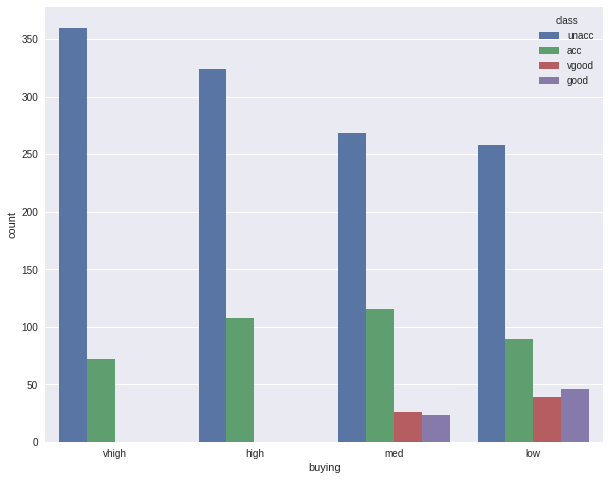

In [ ]:
fig, ax =plt.subplots(figsize=(10,8)) 
sns.countplot(Car_Data['buying'], hue = Car_Data['class'],ax=ax)
plt.show()

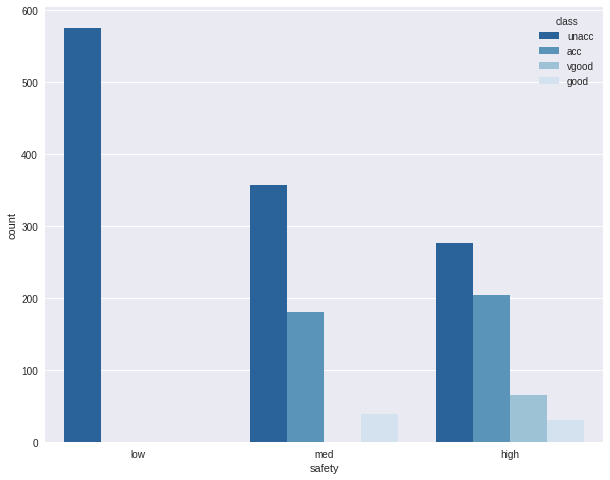

In [ ]:
fig, ax =plt.subplots(figsize=(10,8)) 
sns.countplot(Car_Data['safety'], hue = Car_Data['class'],ax=ax,palette='Blues_r')
plt.show()

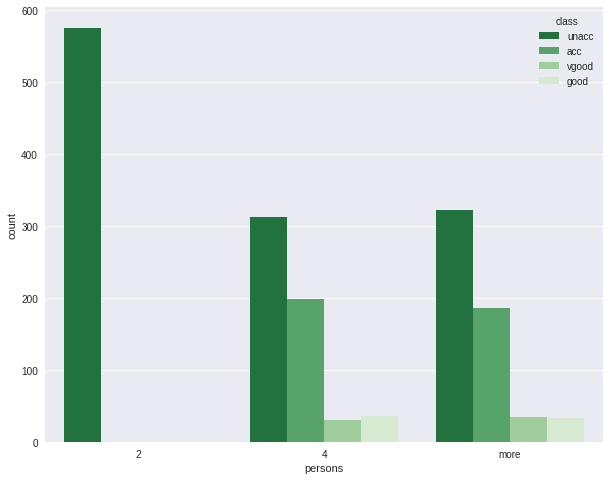

In [ ]:
fig, ax =plt.subplots(figsize=(10,8)) 
sns.countplot(Car_Data['persons'], hue = Car_Data['class'],ax=ax,palette='Greens_r')
plt.show()

In [ ]:
df = Car_Data.copy()

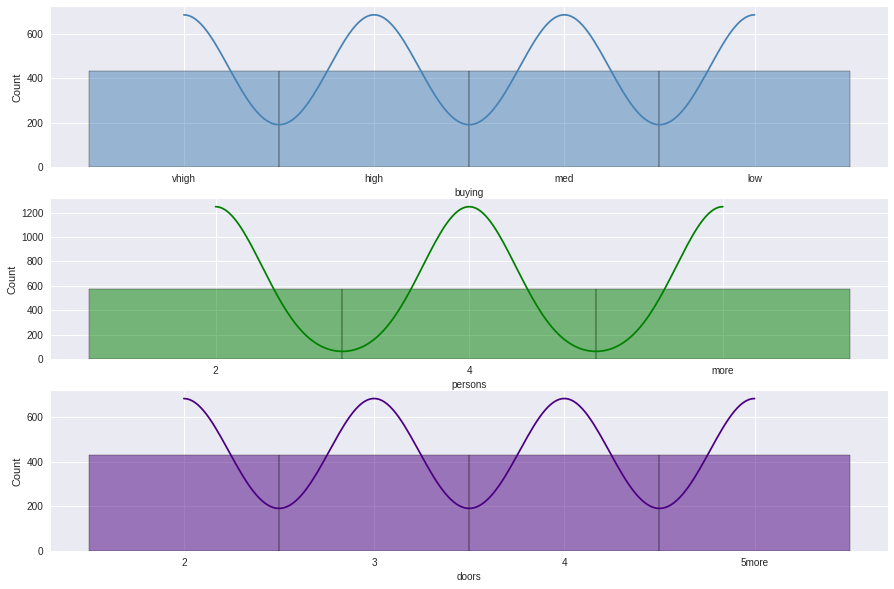

In [ ]:
#Setting the subplot figure size
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,10)) 
#Histplot for buying
sns.histplot(x = df["buying"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("buying",fontsize=10);
#Histplot for persons
sns.histplot(x = df["persons"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("persons",fontsize=10);
#Histplot for doors
sns.histplot(x = df["doors"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("doors",fontsize=10);

In [ ]:
data = Car_Data.copy()

In [ ]:
data['class'],class_names = pd.factorize(data['class'])

In [ ]:
print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [ ]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [ ]:
#Creating the variable x and y
x = data.drop('class', axis=1)
y = data['class']

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state=0)
clusters = kmeans.fit_predict(x)
kmeans.cluster_centers_.shape

(5, 6)

In [ ]:


labels = np.zeros_like(clusters)
for i in range(5):
    mask = (clusters == i)
    labels[y] = mode(y)[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)

0.7002314814814815

In [ ]:
mat = confusion_matrix(y, labels)
mat

array([[1210,    0,    0,    0],
       [ 384,    0,    0,    0],
       [  65,    0,    0,    0],
       [  69,    0,    0,    0]])

Text(91.68, 0.5, 'predicted label')

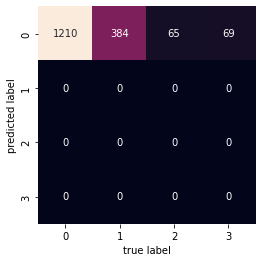

In [ ]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Creating X and Y Variable

In [ ]:
#Creating the variable x and y
x = data.drop('class', axis=1)
y = data['class']

In [ ]:
x

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
1723,3,3,3,2,1,1
1724,3,3,3,2,1,2
1725,3,3,3,2,2,0
1726,3,3,3,2,2,1


In [ ]:
print(class_names)
print(df['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
['unacc' 'acc' 'vgood' 'good']


In [ ]:
#from sklearn.preprocessing import Normalizer
#x = Normalizer().fit_transform(x)

In [ ]:
#split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size = 0.3,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1209, 6)
(1209,)
(519, 6)
(519,)


In [ ]:
#Creating the variable for Standardscaler object
scaler = StandardScaler()
#Fit the model
scaler.fit(X_train)
#Making the transform for x train and x test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)

K-Means

In [ ]:
kmeans = KMeans(n_clusters = 2,random_state=0)

In [ ]:
model = KMeans(n_clusters=2,random_state=0)
model.fit(x)
labels = model.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("correct %.02f classification " % (correct_labels/float(y.size)))

Result: 888 out of 1728 samples were correctly labeled.
correct 0.51 classification 


In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []


for train_index, test_index in kfold.split(x,y):
    X_train= x.iloc[train_index]
    X_test = x.iloc[test_index]
    y_train = y[train_index]
    y_test= y[test_index]
    
    kmeans.fit(X_train)
    y_pred= kmeans.predict(X_test)
    #y_prob= kmeans.predict_proba(X_test)

    predicted=kmeans.predict(X_test)
    cm = confusion_matrix(y_test,predicted)
    print("Confusion Matrix: ")
    print(cm)
    print("\n")
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
    print('Sensitivity for class 1: ', sensitivity )
    SensitivityClass1.append(sensitivity)

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
    print('Sensitivity for class 2: ', sensitivity )
    SensitivityClass2.append(sensitivity)

    sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
    print('Sensitivity for class 3: ', sensitivity )
    SensitivityClass3.append(sensitivity)

    sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
    print('Sensitivity for class 4: ', sensitivity )
    SensitivityClass4.append(sensitivity)
    #----------------------------------------------------------------------
    print("\n")
    specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
    print('Specificity for class 1: ', specificity)
    SpecificityClass1.append(specificity)

    specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
    print('Specificity for class 2: ', specificity)
    SpecificityClass2.append(specificity) 

    specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
    print('Specificity for class 3: ', specificity)
    SpecificityClass3.append(specificity) 

    specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
    print('Specificity for class 4: ', specificity)
    SpecificityClass4.append(specificity)

#-----------------------------------------------------------------------------------
    #skplt.metrics.plot_roc(y_test, y_pred,figsize=(10,6),title_fontsize=12,text_fontsize=10)
    #plt.show()

Confusion Matrix: 
[[216  26   0   0]
 [  5  72   0   0]
 [  0  13   0   0]
 [  0  14   0   0]]


Sensitivity for class 1:  0.8925619834710744
Sensitivity for class 2:  0.935064935064935
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0


Specificity for class 1:  0.935064935064935
Specificity for class 2:  0.8029739776951673
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Confusion Matrix: 
[[242   0   0   0]
 [ 77   0   0   0]
 [  0  13   0   0]
 [  0  14   0   0]]


Sensitivity for class 1:  1.0
Sensitivity for class 2:  0.0
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0


Specificity for class 1:  0.0
Specificity for class 2:  0.8996282527881041
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Confusion Matrix: 
[[198  44   0   0]
 [ 26  51   0   0]
 [  0  13   0   0]
 [  0  14   0   0]]


Sensitivity for class 1:  0.8181818181818182
Sensitivity for class 2:  0.6623376623376623
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KMeans:")
print(result)
print("\n")
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for KMeans :",)
print (result1)
print("\n")
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For KMeans :",result2)
print("\n")

Confusion Matrix for KMeans:
[[118 124   0   0]
 [ 32  44   0   0]
 [  5   8   0   0]
 [  2  12   0   0]]


Classification Report for KMeans :
              precision    recall  f1-score   support

           0       0.75      0.49      0.59       242
           1       0.23      0.58      0.33        76
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        14

    accuracy                           0.47       345
   macro avg       0.25      0.27      0.23       345
weighted avg       0.58      0.47      0.49       345



Overall Accuracy For KMeans : 46.95652173913044




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
for train_index, test_index in kfold.split(x,y):
  model.fit(X_train, y_train)
  #Making the prediction on X_test
  y_pred = model.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = model.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
KMeans_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("KMeans model accuracy(in %) for Training:",KMeans_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
KMeans_Test = metrics.accuracy_score(y_test, y_pred)*100
print("KMeans model accuracy(in %) for Testing:", KMeans_Test)

KMeans model accuracy(in %) for Training: 48.300795372378886
KMeans model accuracy(in %) for Testing: 46.95652173913044


C-Means

In [ ]:
cmeans = FCM(n_clusters = 2) 

In [ ]:
SensitivityClass1 = []
SensitivityClass2 = []
SensitivityClass3 = []
SensitivityClass4 = []

SpecificityClass1 = []
SpecificityClass2 = []
SpecificityClass3 = []
SpecificityClass4 = []



for train_index, test_index in kfold.split(x,y):
    X_train= x.iloc[train_index]
    X_test = x.iloc[test_index]
    y_train = y[train_index]
    y_test= y[test_index]
    
    cmeans.fit(X_train.to_numpy())
    y_pred= cmeans.predict(X_test.to_numpy())
    #y_prob= kmeans.predict_proba(X_test)

    predicted=cmeans.predict(X_test.to_numpy())
    cm = confusion_matrix(y_test,predicted)
    print("Confusion Matrix: ")
    print(cm)
    print("\n")
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
    print('Sensitivity for class 1: ', sensitivity )
    SensitivityClass1.append(sensitivity)

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
    print('Sensitivity for class 2: ', sensitivity )
    SensitivityClass2.append(sensitivity)

    sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
    print('Sensitivity for class 3: ', sensitivity )
    SensitivityClass3.append(sensitivity)

    sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
    print('Sensitivity for class 4: ', sensitivity )
    SensitivityClass4.append(sensitivity)
    #----------------------------------------------------------------------
    print("\n")
    specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
    print('Specificity for class 1: ', specificity)
    SpecificityClass1.append(specificity)

    specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
    print('Specificity for class 2: ', specificity)
    SpecificityClass2.append(specificity) 

    specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
    print('Specificity for class 3: ', specificity)
    SpecificityClass3.append(specificity) 

    specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
    print('Specificity for class 4: ', specificity)
    SpecificityClass4.append(specificity)

#-----------------------------------------------------------------------------------

Confusion Matrix: 
[[153  89   0   0]
 [  5  72   0   0]
 [  2  11   0   0]
 [  0  14   0   0]]


Sensitivity for class 1:  0.6322314049586777
Sensitivity for class 2:  0.935064935064935
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0


Specificity for class 1:  0.9113924050632911
Specificity for class 2:  0.5730337078651685
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Confusion Matrix: 
[[  0 242   0   0]
 [  0  77   0   0]
 [ 13   0   0   0]
 [ 14   0   0   0]]


Sensitivity for class 1:  0.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0.0


Specificity for class 1:  0.7403846153846154
Specificity for class 2:  0.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Confusion Matrix: 
[[164  78   0   0]
 [ 50  27   0   0]
 [  0  13   0   0]
 [  0  14   0   0]]


Sensitivity for class 1:  0.6776859504132231
Sensitivity for class 2:  0.35064935064935066
Sensitivity for class 3:  0.0
Sensitivity for class 4:  0

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for CMeans:")
print(result)
print("\n")
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for CMeans :",)
print (result1)
print("\n")
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For CMeans :",result2)
print("\n")

Confusion Matrix for CMeans:
[[122 120   0   0]
 [ 37  39   0   0]
 [ 11   2   0   0]
 [ 14   0   0   0]]


Classification Report for CMeans :
              precision    recall  f1-score   support

           0       0.66      0.50      0.57       242
           1       0.24      0.51      0.33        76
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        14

    accuracy                           0.47       345
   macro avg       0.23      0.25      0.23       345
weighted avg       0.52      0.47      0.47       345



Overall Accuracy For CMeans : 46.666666666666664




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
for train_index, test_index in kfold.split(x,y):
  cmeans.fit(X_train.to_numpy())
  #Making the prediction on X_test
  y_pred = model.predict(X_test)
  #Making the prediction on X_train
  y_pred1 = cmeans.predict(X_train.to_numpy())

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
CMeans_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("CMeans model accuracy(in %) for Training:",CMeans_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
CMeans_Test = metrics.accuracy_score(y_test, y_pred)*100
print("CMeans model accuracy(in %) for Testing:", CMeans_Test)

CMeans model accuracy(in %) for Training: 41.79320318148952
CMeans model accuracy(in %) for Testing: 46.95652173913044
